# Text mining(1)

Name: Aruna M | Batch Date: 27 Jan 2022

### Business problem:

Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)



In [1]:
# Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import warnings
import re
import string
import nltk

In [2]:
df=pd.read_csv("C:\\Users\\Aruna\\Downloads\\Elon_musk.csv",encoding = "ISO-8859-1")

In [3]:
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings('ignore',category=DeprecationWarning)


In [4]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!


In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1994,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [7]:
df = [Text.strip() for Text in df.Text] # remove both the leading and the trailing characters
df = [Text for Text in df if Text] # removes empty strings, because they are considered in Python as False
df[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [8]:
# Joining the list into one string/text
text = ' '.join(df)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [9]:
#Tokenization
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['@', 'kunalb11', 'I\x92m', 'an', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'is', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for']


In [10]:
len(text_tokens)

28892

In [11]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['@', 'kunalb11', 'I\x92m', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Noramalize the data
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words[0:25])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tried', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge']


In [13]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tri', '?', '@', 'joerogan', '@', 'spotifi', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestim', '@', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', '.', 'now', 'next', 'even', '!']


In [15]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')  

In [16]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

@ kunalb11 Im alien @ ID_AA_Carmack Ray tracing Cyberpunk HDR next-level . Have tried ? @ joerogan @ Spotify Great interview ! @ gtera27 Doge underestimated @ teslacn Congratulations Tesla China amazing execution last year . Now next


In [17]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['@', 'kunalb11', 'I\x92m', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'next', '-', 'level', '.', 'have', 'try', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@']


## Feature extraction

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [19]:
print(vectorizer.vocabulary_)

{'kunalb11': 2452, 'alien': 434, 'id_aa_carmack': 2144, 'ray': 3478, 'trace': 4389, 'cyberpunk': 1203, 'hdr': 2017, 'next': 2947, 'level': 2528, 'have': 2007, 'try': 4423, 'joerogan': 2351, 'spotify': 3991, 'great': 1935, 'interview': 2261, 'gtera27': 1954, 'doge': 1368, 'underestimate': 4492, 'teslacn': 4229, 'congratulations': 1095, 'tesla': 4221, 'china': 971, 'amazing': 460, 'execution': 1603, 'last': 2483, 'year': 4862, 'now': 2992, 'even': 1575, 'happy': 1993, 'new': 2944, 'ox': 3131, 'https': 2110, 'co': 1022, '9wfkmyu2oj': 310, 'frodo': 1792, 'underdoge': 4491, 'all': 437, 'thought': 4309, 'would': 4793, 'fail': 1645, 'himself': 2062, 'zgxjfdzzrm': 4905, 'owensparks': 3128, 'flcnhvy': 1730, 'anonyx10': 490, 'haha': 1977, 'thank': 4265, 'indeed': 2197, 'tweet': 4443, 'definitely': 1265, 'represent': 3561, 'real': 3493, 'world': 4787, 'time': 4326, 'allocation': 439, 'the': 4273, 'entertaining': 1522, 'outcome': 3107, 'likely': 2551, 'givedirectly': 1894, 'just': 2382, 'send': 37

In [20]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['0001f62c', '0001f62e', '0001f634', '0001f680', '0001f6f0', '0001f914', '0001f917', '0001f918', '0001f920', '0001f923', '0001f9d9', '0001f9db', '0001fa82', '041a', '041e', '0430', '0431', '0432', '0434', '0435', '0438', '043a', '043b', '043c', '043d', '043e', '043f', '0440', '0441', '044b', '044c', '0451', '05', '07puoramgo', '095whx44bx', '0ckvhrmtf1', '0ct2svangy', '0gutz4kgij', '0kaav0dtnn', '0rc72s0zay', '0s0ybscm0p', '0srlfg03fg', '0vas3cck9p', '0y5fkvqpk8', '10', '100', '1000', '107', '10x', '11']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
print(X.toarray().shape)

(25023, 4928)


## Bigram and Trigram Analysis

In [22]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)

In [23]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


## TF-IDF Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

## Word Cloud 

In [25]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

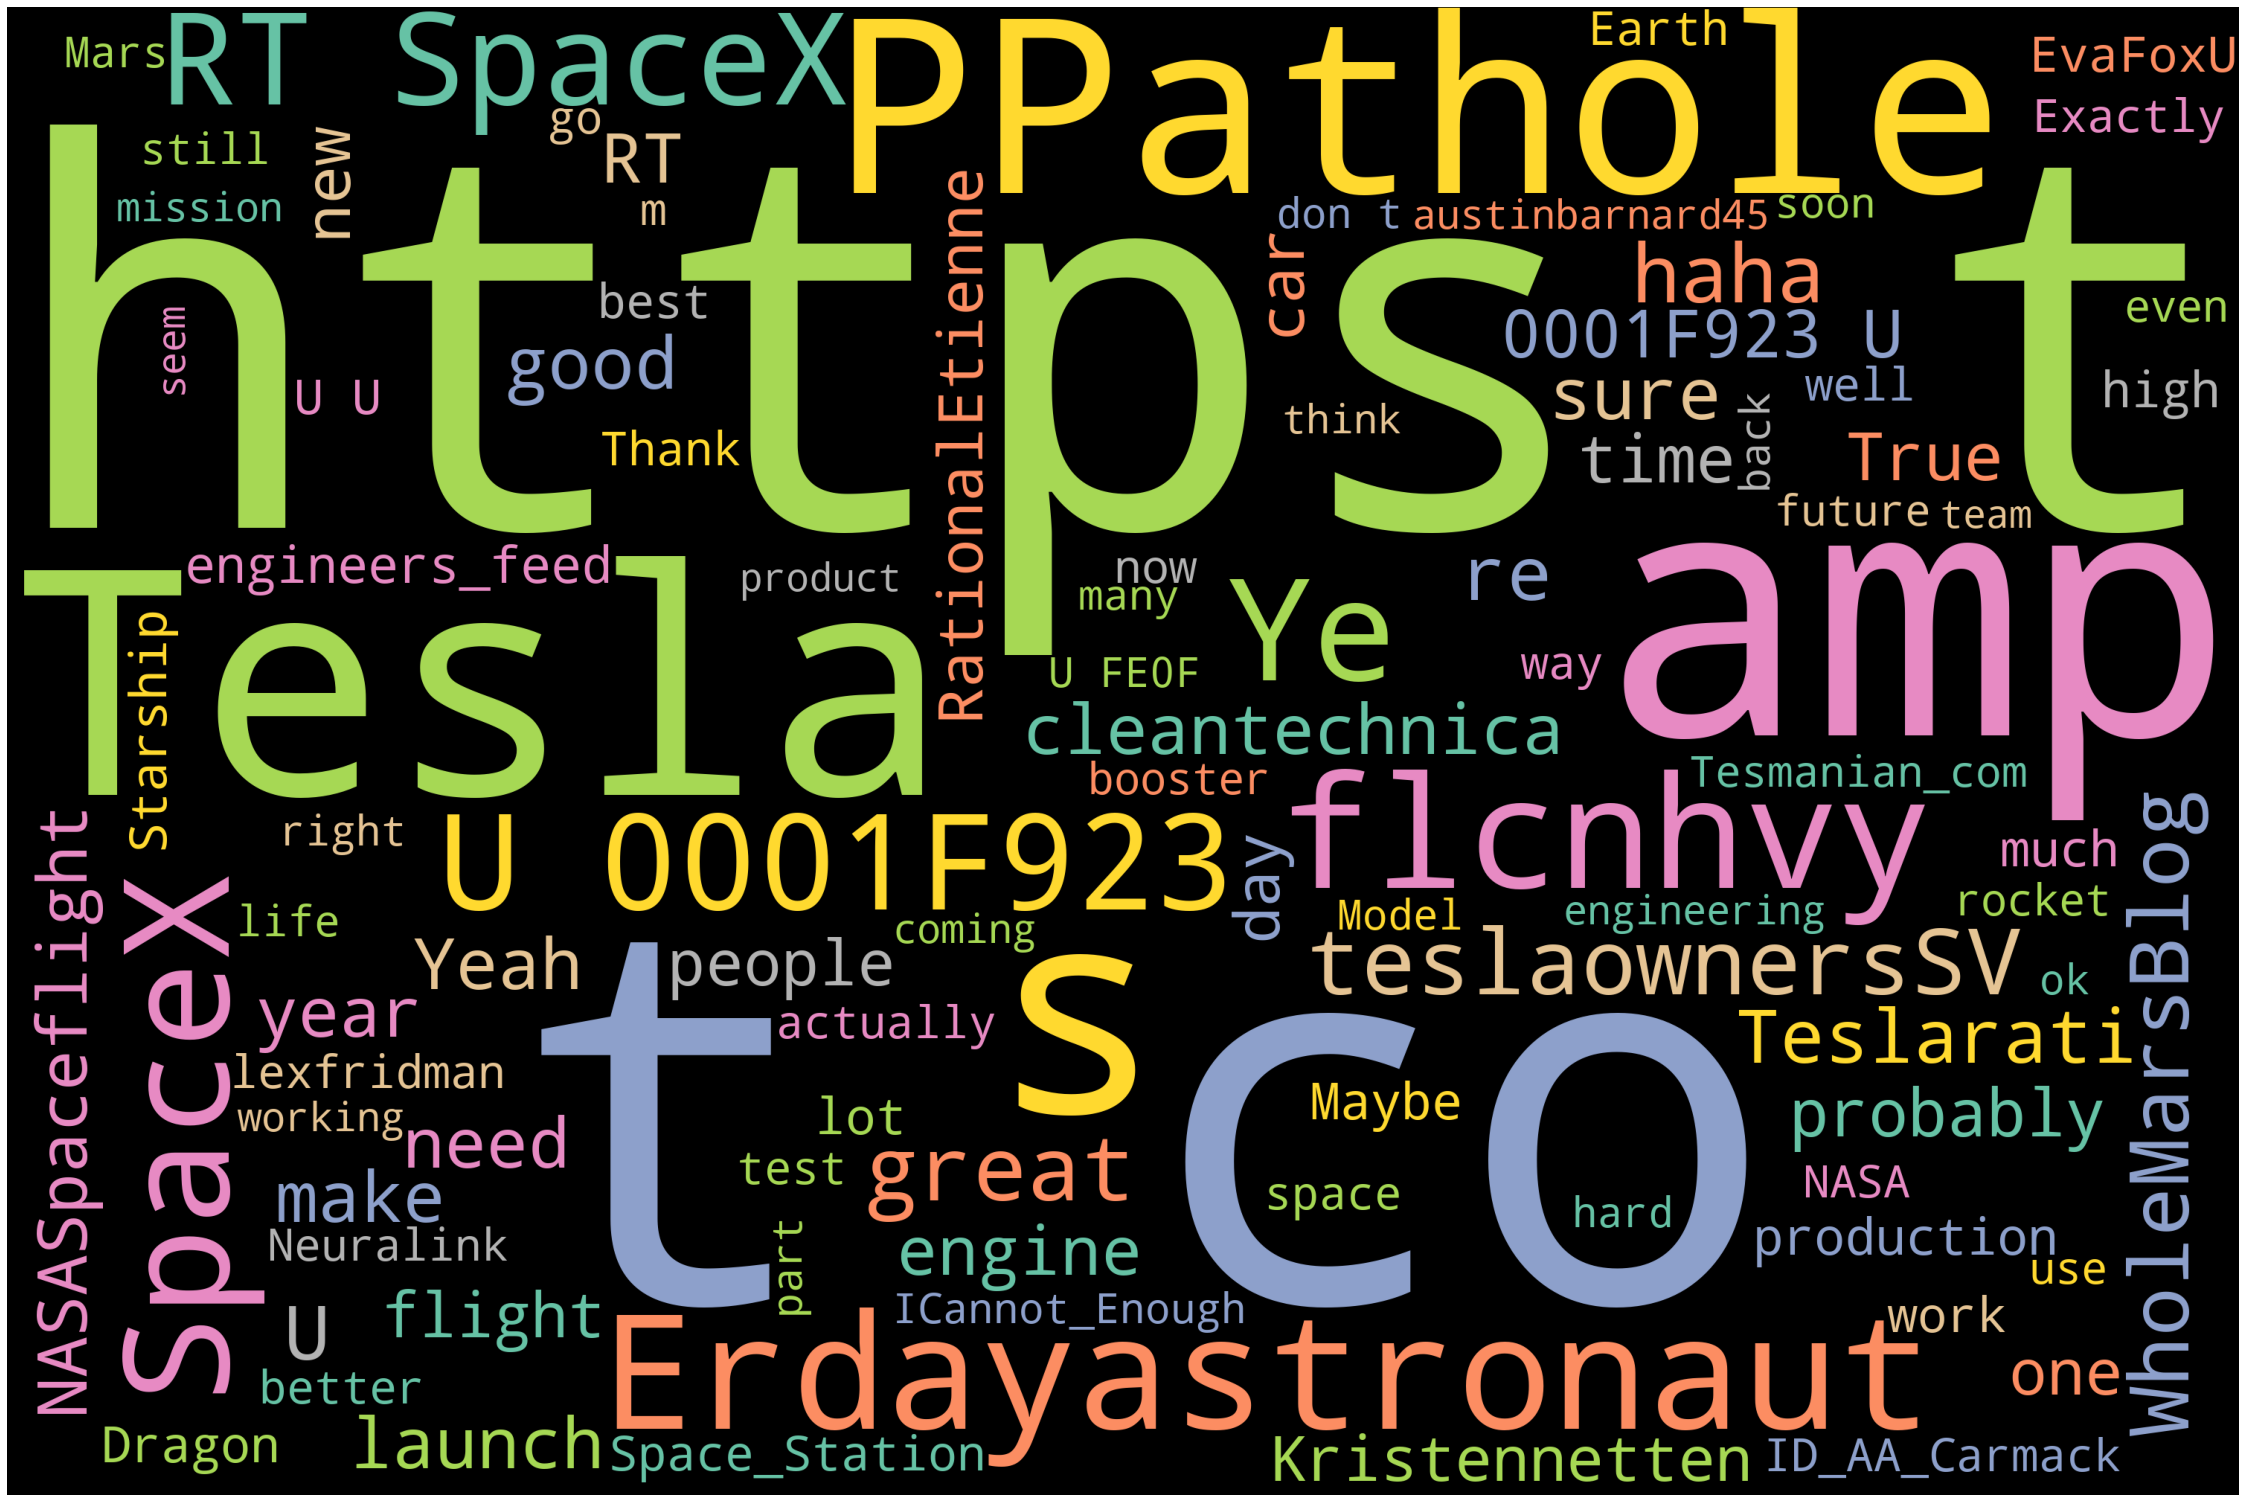

In [26]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)